In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
df1 = pd.read_csv("data/test.csv")
df2 = pd.read_csv("data/train.csv")
df = pd.concat([df1,df2], ignore_index=True)

#move sale_price (Y) to the last column for readability
sale_price_column = df.pop('sale_price')
df['sale_price'] = sale_price_column

df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,...,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,sale_price
0,1,maruti swift dzire,2012,petrol,69029,pune,2068,sedan,manual,vxi 1.2 bs iv,...,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False,364299
1,2,hyundai eon,2013,petrol,45721,gurgaon,903,hatchback,manual,era plus,...,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False,216799
2,3,honda amaze,2013,diesel,37395,pune,2809,sedan,manual,1.5 smt i dtec,...,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False,387399
3,4,hyundai i20,2012,petrol,37652,bengaluru,1054,hatchback,manual,magna o 1.2,...,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False,364699
4,5,hyundai creta,2017,diesel,53648,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,...,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False,1082011


# Exploring Numerical Data

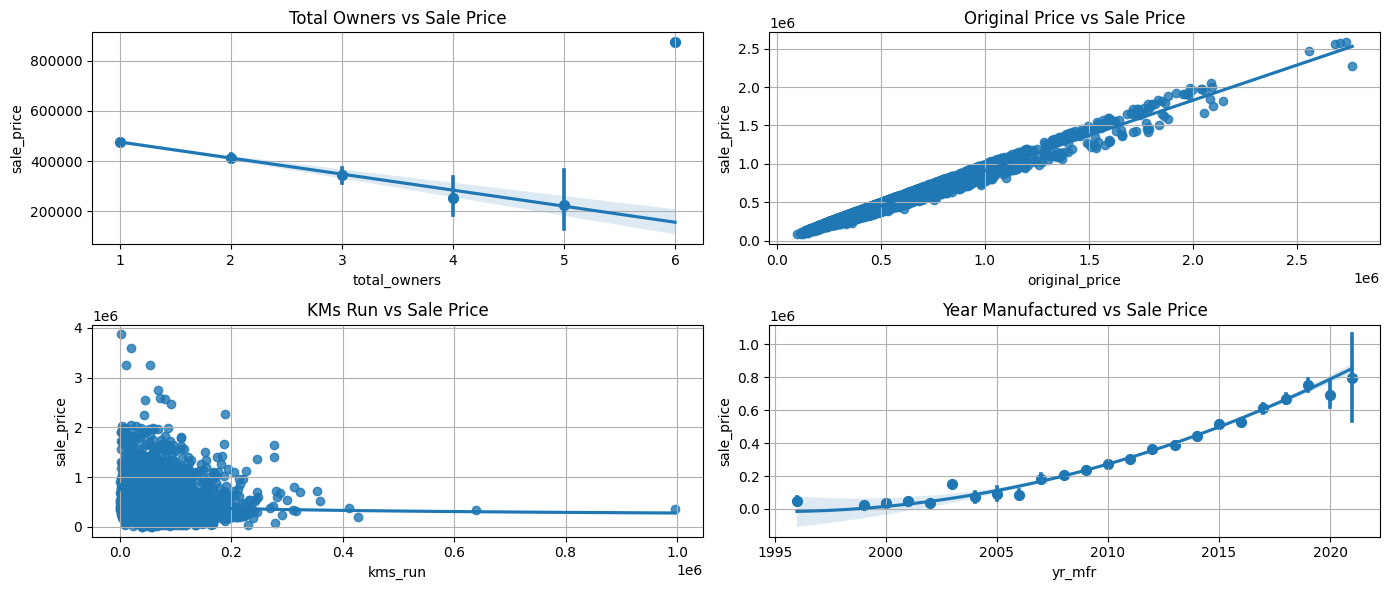

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

sns.regplot(data=df, x="total_owners", y="sale_price", x_estimator=np.mean, ax=axes[0,0])
axes[0,0].set_title('Total Owners vs Sale Price')
axes[0,0].grid(True)


sns.regplot(data=df, x="original_price", y="sale_price", ax=axes[0,1])
axes[0,1].set_title('Original Price vs Sale Price')
axes[0,1].grid(True)

sns.regplot(data=df, x="kms_run", y="sale_price", ax=axes[1,0], logx=True)
axes[1,0].set_title('KMs Run vs Sale Price')
axes[1,0].grid(True)


sns.regplot(data=df, x="yr_mfr", y="sale_price",  x_estimator=np.mean, ax=axes[1,1], order=2)
axes[1,1].set_title('Year Manufactured vs Sale Price') 
axes[1,1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


# Categorical Data

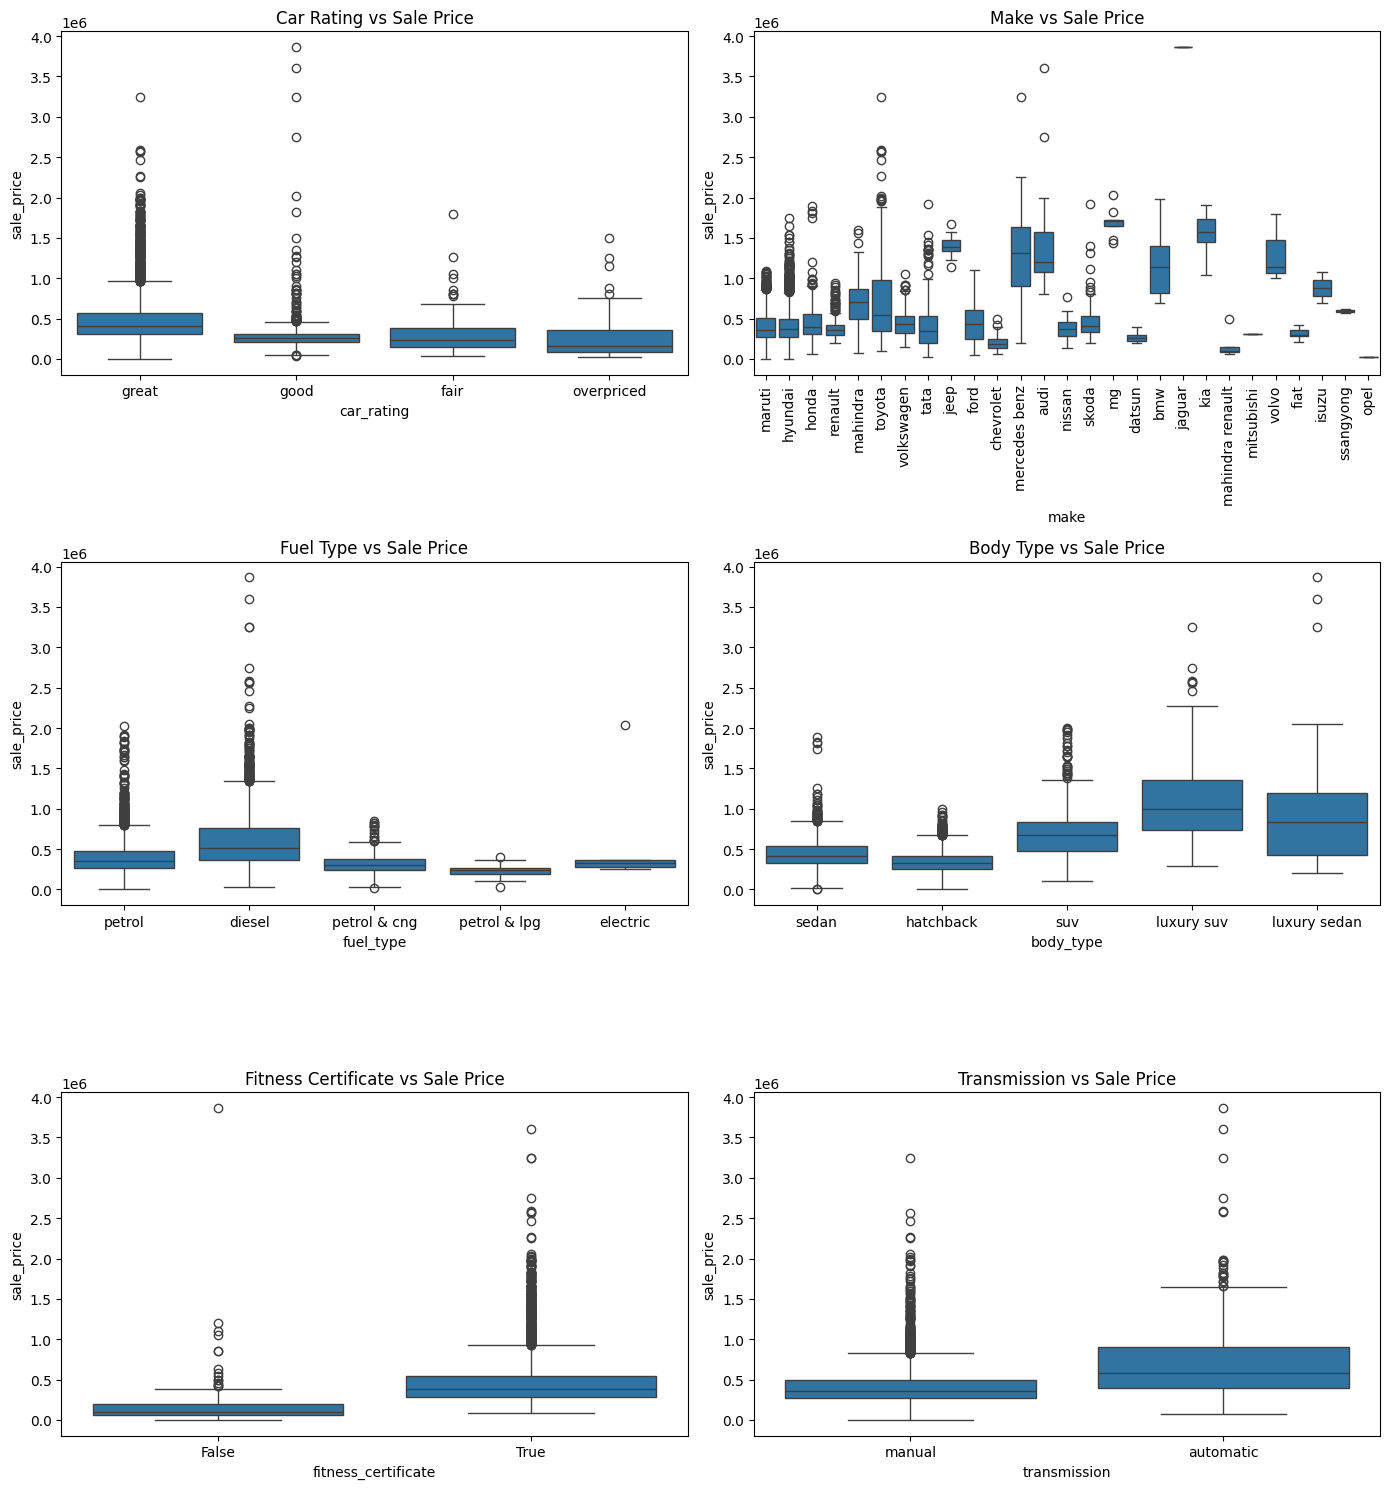

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(14, 15)) 

sns.boxplot(data=df, x="car_rating", y="sale_price", ax=axes[0, 0])
axes[0, 0].set_title('Car Rating vs Sale Price')

sns.boxplot(data=df, x="make", y="sale_price", ax=axes[0, 1])
axes[0, 1].set_title('Make vs Sale Price')
axes[0, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels in the second subplot

sns.boxplot(data=df, x="fuel_type", y="sale_price", ax=axes[1, 0]) 
axes[1, 0].set_title('Fuel Type vs Sale Price')

sns.boxplot(data=df, x="body_type", y="sale_price", ax=axes[1, 1])
axes[1, 1].set_title('Body Type vs Sale Price')

sns.boxplot(data=df, x="fitness_certificate", y="sale_price", ax=axes[2, 0])
axes[2, 0].set_title('Fitness Certificate vs Sale Price')

sns.boxplot(data=df, x="transmission", y="sale_price", ax=axes[2,1])  
axes[2, 1].set_title('Transmission vs Sale Price')


# Display the plots
plt.tight_layout()
plt.show()

C:\Users\Artil\AppData\Local\Temp\ipykernel_22636\3151962878.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

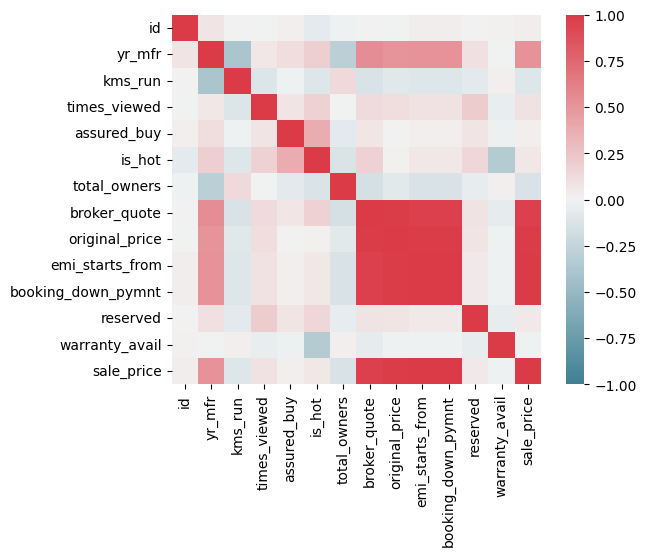

In [21]:
sns.heatmap(df.corr(),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True)